# Exploratory analysis of speed trajectories in WT and focus lines

### Goals: 
- Determine whether an analysis of the detailed timing and temporal coordination of a) bursts and/or b) overall speed is practical in this dataset
- Get a sense of what types of motion patterns are common in WT (and potentially how they differ in other focus lines)

Adapted from JD's "Minimal example"


# Import and load basic variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd  # just using this to display things nicely
pd.set_option('display.max_rows', None)

In [2]:
# define directories and import list of lines
datadir = '../data/'
resultdir = 'savedresults/'

[treatments] = pickle.load(open(resultdir+'treatmentlist.pkl','rb'))
treatments = np.array(treatments)
numtreatments = len(treatments)
[focustreatments,notfocus] = pickle.load(open(resultdir+'focustreatmentlist.pkl','rb'))
[allnumtrials] = pickle.load(open(resultdir+'allnumtrials.pkl','rb'))

# Some info on how data is organized

In [3]:
# everything is organized by 'treatment', and index by treatment number
# different number of trials per line
df = pd.DataFrame(np.array([np.arange(numtreatments),treatments,allnumtrials]).T, columns=['tnum','line name','number of trials'])
df.style.hide_index()

tnum,line name,number of trials
0,WT,33
1,adra1aaHO,8
2,chrna2aHO,10
3,kctd13KO,28
4,scn1labHT,22
5,shank3bKO,14
6,slc18a2HT,9
7,slc22a15HO,12
8,slc25a27HO,8
9,slc39a11HO,7


In [4]:
# 'focustreatments' are the ones used in the paper.
print('focustreatments')
df = pd.DataFrame(np.array([focustreatments,treatments[focustreatments],allnumtrials[focustreatments]]).T,columns=['tnum','line name','number of trials'])
df.style.hide_index()

focustreatments


tnum,line name,number of trials
0,WT,33
46,immp2lHO,16
65,ctnnd2bHO,11
4,scn1labHT,22
50,disc1KO,9
2,chrna2aHO,10


# Import data for single line, all trials

In [5]:
tnum = 0  # select which line
treatment = treatments[tnum]
numtrials = allnumtrials[tnum]
print(treatment,', ',numtrials,' trials')
[trial_speeds,trial_trajectories,trial_headings,trial_theta,
            trial_smoothspeeds,trial_smoothtrajectories,trial_smoothheadings,
            trial_ellipses,trial_arena,trial_sex,
            datafiles,trial_trackingerrors] = pickle.load(open(datadir+treatment+'-alltrials.pkl','rb'))

WT ,  33  trials


In [6]:
# each is a list that contains data for each trial.  
# For each trial its a numpy array organized by [frame,fish,quantity]
print('len(trial_trajectories):',len(trial_trajectories))
print('trial_trajectories[0].shape:',trial_trajectories[0].shape)

len(trial_trajectories): 33
trial_trajectories[0].shape: (108007, 6, 2)


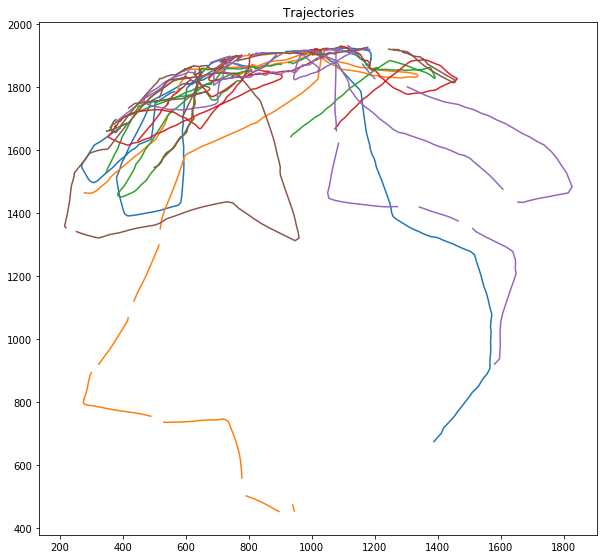

Text(0.5, 1.0, 'Fish 4-5 Orientation')

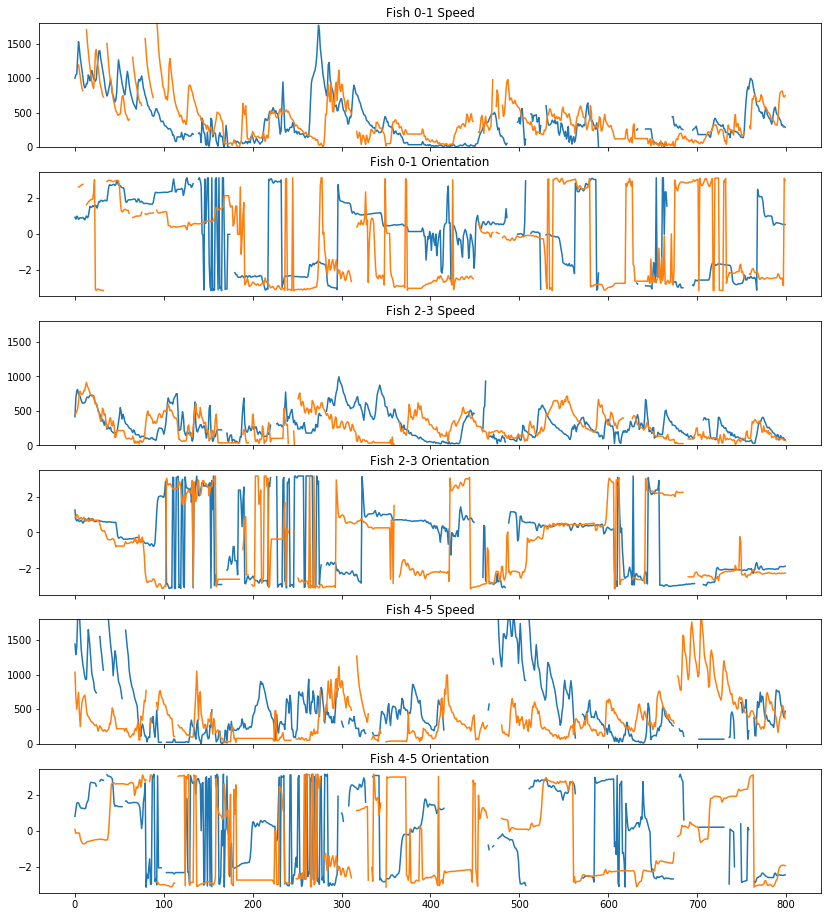

In [15]:
# choose a trial and plot a short trajectory segment
# use non-smoothed coordinates, which contains NaN values

trialnum = 8
minframe= 2400
duration = 800
maxframe = minframe + duration
x = trial_trajectories[trialnum][minframe:maxframe,:,0]
y = trial_trajectories[trialnum][minframe:maxframe,:,1]
# for orientations, best to use 'smoothheadings'
orientations = trial_headings[trialnum][minframe:maxframe]
speeds = trial_speeds[trialnum][minframe:maxframe]

#get distances bw pairs in twin of interest

# plot trajectory segment
f,ax = plt.subplots(1,1)
f.set_size_inches(10,10)
ax.set_aspect(1)
ax.plot(x,y)
ax.set_title('Trajectories')
plt.show()

# plot orientation and speed, and (opt) nan values
f,ax=plt.subplots(6,1,sharex=True)
f.set_size_inches(14,16)
a = ax[0]
a.plot(speeds[:,0:2])
a.set_ylim([0,1800])
a.set_title('Fish 0-1 Speed')
a = ax[1]
a.plot(orientations[:,0:2])
a.set_title('Fish 0-1 Orientation')
a = ax[2]
a.plot(speeds[:,2:4])
a.set_ylim([0,1800])
a.set_title('Fish 2-3 Speed')
a = ax[3]
a.plot(orientations[:,2:4])
a.set_title('Fish 2-3 Orientation')
a = ax[4]
a.plot(speeds[:,4:])
a.set_ylim([0,1800])
a.set_title('Fish 4-5 Speed')
a = ax[5]
a.plot(orientations[:,4:])
a.set_title('Fish 4-5 Orientation')
# a = ax[6]
# a.plot(np.isnan(speeds))
# a.set_title('NaN values')
# plt.show()

In [8]:
speeds.shape

(800, 6)

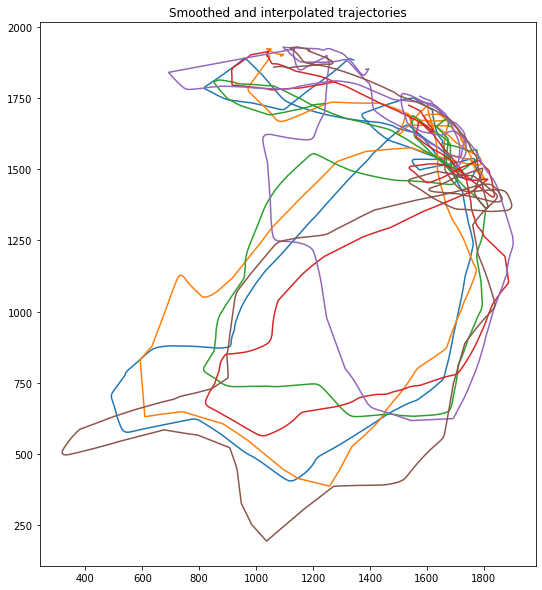

Text(0.5, 1.0, 'Fish 4-5 Orientation')

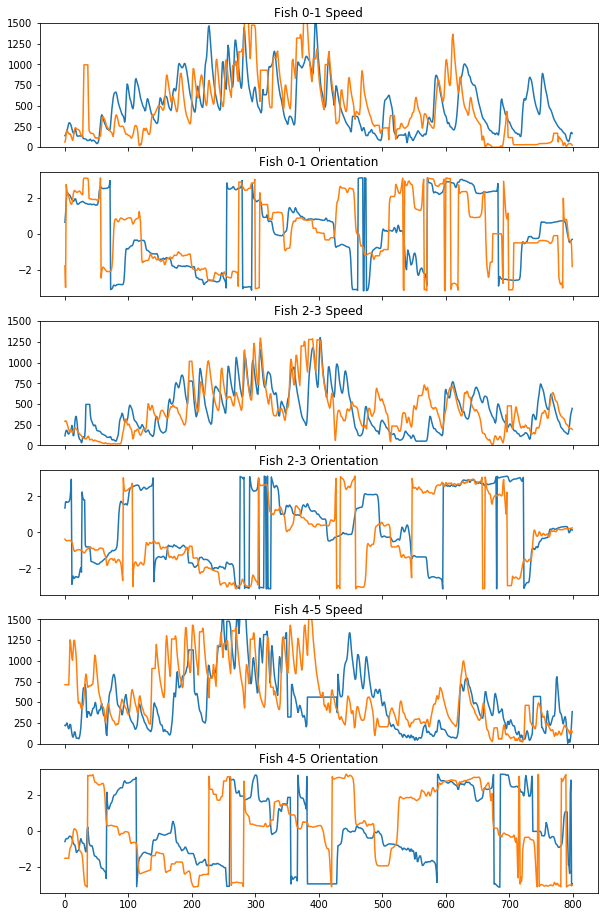

In [13]:
# choose a trial and plot a short trajectory segment
# use smoothed coordinates and calculations, which uses Gaussian smoothing, replace nan locations with interpolations for trajectories

# trialnum = 8
# minframe= 1500
# duration = 500
x_smooth = trial_smoothtrajectories[trialnum][minframe:maxframe,:,0]
y_smooth = trial_smoothtrajectories[trialnum][minframe:maxframe,:,1]
# for orientations, best to use 'smoothheadings'
orientations_smooth = trial_smoothheadings[trialnum][minframe:maxframe]
speeds_smooth = trial_smoothspeeds[trialnum][minframe:maxframe]

# plot trajectory segment
f,ax = plt.subplots(1,1)
f.set_size_inches(10,10)
ax.set_aspect(1)
ax.plot(x_smooth,y_smooth)
ax.set_title('Smoothed and interpolated trajectories')
plt.show()

# plot orientation and speed, and (opt) nan values
f,ax=plt.subplots(6,1,sharex=True)
f.set_size_inches(10,16)
a = ax[0]
a.plot(speeds_smooth[:,0:2])
a.set_ylim([0,1500])
a.set_title('Fish 0-1 Speed')
a = ax[1]
a.plot(orientations_smooth[:,0:2])
a.set_title('Fish 0-1 Orientation')
a = ax[2]
a.plot(speeds_smooth[:,2:4])
a.set_ylim([0,1500])
a.set_title('Fish 2-3 Speed')
a = ax[3]
a.plot(orientations_smooth[:,2:4])
a.set_title('Fish 2-3 Orientation')
a = ax[4]
a.plot(speeds_smooth[:,4:])
a.set_ylim([0,1500])
a.set_title('Fish 4-5 Speed')
a = ax[5]
a.plot(orientations_smooth[:,4:])
a.set_title('Fish 4-5 Orientation')
# a = ax[6]
# a.plot(np.isnan(speeds))
# a.set_title('NaN values')
# plt.show()

### smoothed speeds & orientations look cleaner, but possibly worse for detailed timing analysis - e.g peak time could be shifted slightly, minor waggles during the glide phase reduced or lost, possible "ramping" bursts are harder to detect